In [1]:
import sys  
sys.path.insert(1, '../')
from utils.dataset_utils import OriginalDataset
from utils.video_prediction import (train_ipf)

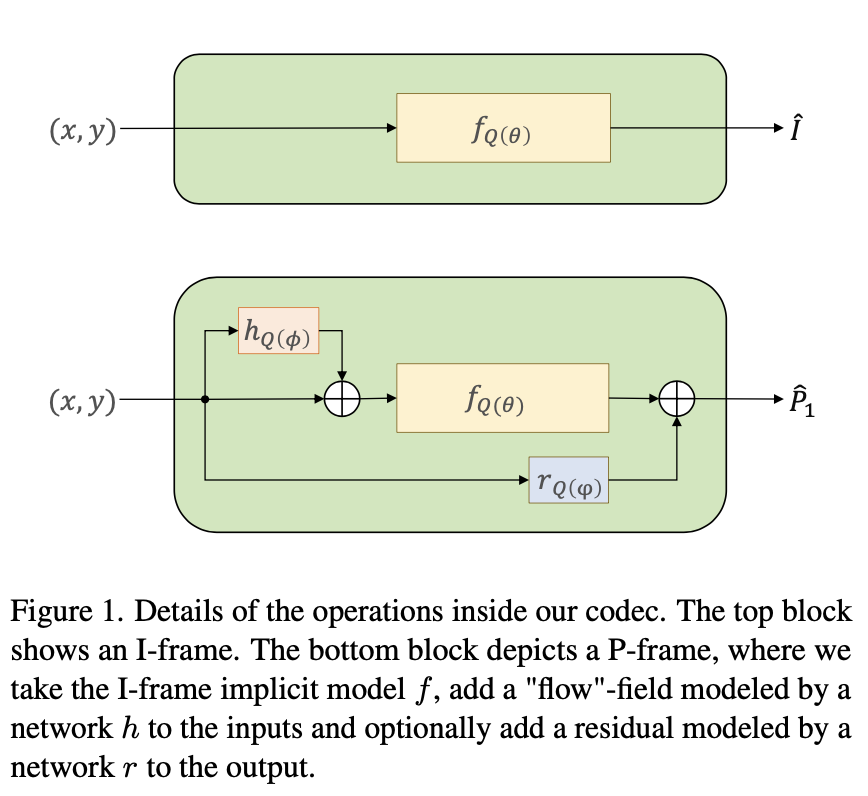
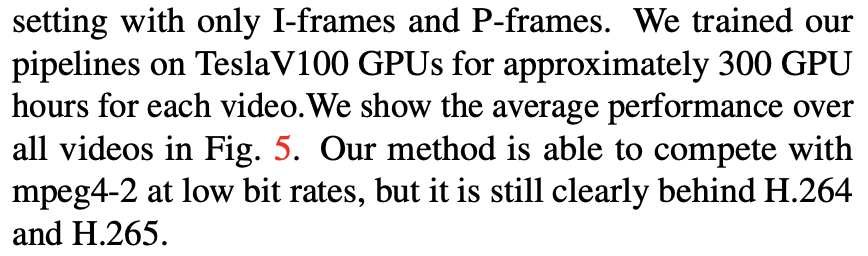

In [2]:
original_dataset = OriginalDataset('../datasets/droid_100_sample_pictures')
len_ = (original_dataset.__len__())
print(len_)

166


In [3]:
import torch
video_frames = []
for i in range(2):
    video_frames.append(torch.tensor(original_dataset[i], dtype=torch.float32))

In [4]:
i_frame_model = train_ipf(video_frames)

Training I-frame model...
Epoch 0, Loss: 15829.15234375
Epoch 100, Loss: 13449.5869140625
Epoch 200, Loss: 10000.5390625
Epoch 300, Loss: 9358.1640625
Epoch 400, Loss: 8721.8818359375
Epoch 500, Loss: 7146.50634765625
Epoch 600, Loss: 4523.27392578125
Epoch 700, Loss: 4757.787109375
Epoch 800, Loss: 4710.35693359375
Epoch 900, Loss: 5421.3173828125
Quantizing and Freezing I-frame model...
displacement.size() = torch.Size([180, 320, 2])


In [6]:
# torch.rand((video_frames[0].size(), 2))
print(video_frames[0].size())
flatten = video_frames[0].flatten(0,1)
print(flatten.size())
x = video_frames[0].size()[0]
y = video_frames[0].size()[1]
xxx = 400
ii = xxx // y
jj = xxx % y
print(video_frames[0][ii][jj])
print(flatten[xxx])
print(i_frame_model)
input_t = torch.tensor([ii, jj], dtype=torch.float32)
print(input_t.size())
res = i_frame_model(input_t)
print(res)


torch.Size([180, 320, 3])
torch.Size([57600, 3])
tensor([ 79.,  92., 101.])
tensor([ 79.,  92., 101.])
SIREN(
  (hidden): Linear(in_features=2, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=3, bias=True)
)
torch.Size([2])
tensor([22.8313, 17.9051, -2.7724])


In [14]:
x = video_frames[0].size()[0]
y = video_frames[0].size()[1]
out_img = torch.zeros(video_frames[0].size(), dtype=torch.int8)
for i in range(x):
    for j in range(y):
        input_t = torch.tensor([i, j], dtype=torch.float32)
        # print(input_t)
        res = i_frame_model(input_t)
        out_img[i,j,:] = abs(res)
        


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


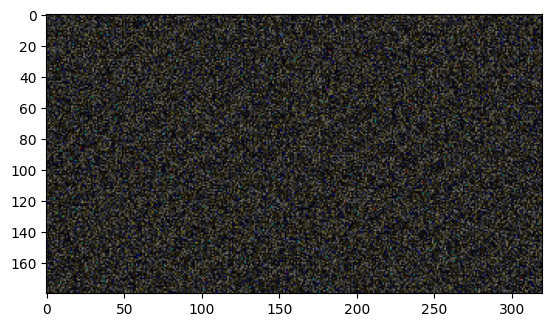

In [18]:
import matplotlib.pyplot as plt
plt.imshow(out_img)
# plt.show()